# 1.) Importing libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r"C:\Users\andyc\Achievement 4 Project"

In [4]:
customer_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merge.pkl'))

In [5]:
customer_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,Slowest_days,busiest_period_of_day,Busy_days,max_order,loyalty_flag,average_spending,spending_flag,order_regularity,order_frequency_flag,merge_c
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,Busiest days,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,Regularly busy,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,Busiest days,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,Regularly busy,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Slowest days,Most orders,Slowest days,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


In [6]:
#checking column names
customer_merge.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days', 'Slowest days',
       'Busiest_days', 'Slowest_days', 'busiest_period_of_day', 'Busy_days',
       'max_order', 'loyalty_flag', 'average_spending', 'spending_flag',
       'order_regularity', 'order_frequency_flag', 'merge_c'],
      dtype='object')

In [7]:
#Checking the number of rows and columns
customer_merge.shape

(32405122, 37)

# 2.) Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The first_name and surname column within the data set could potentially be traced back to a particular person, therefore we would have to work with PII. 

# 3.) The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data.

In [11]:
# loop for the customer_merge
region_result = []

for value in customer_merge["state"]:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    region_result.append("Region 1(Northeast)")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    region_result.append("Region 2(Midwest)")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    region_result.append("Region 3(South)")
  else:
    region_result.append("Region 4(West)")

In [12]:
region_result

['Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 2(Midwest)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West)',
 'Region 4(West

In [13]:
#creating the Region column based off the state column
customer_merge['Region'] = region_result

In [14]:
customer_merge['spending_flag']

0           Low Spender
1           Low Spender
2           Low Spender
3           Low Spender
4           Low Spender
               ...     
32405117    Low Spender
32405118    Low Spender
32405119    Low Spender
32405120    Low Spender
32405121    Low Spender
Name: spending_flag, Length: 32405122, dtype: object

In [15]:
#Creating a crosstab for the 'region' and 'spending-flag' column
spending_habits = pd.crosstab(customer_merge['Region'], customer_merge['spending_flag'], dropna = False)

In [16]:
spending_habits.head()

spending_flag,High Spender,Low Spender
Region,,
Region 1(Northeast),18642,5704158
Region 2(Midwest),29265,7568126
Region 3(South),40564,10751393
Region 4(West),31223,8261751


### There is no difference in spending habits betwwen the different regions in the U.S.

# 4.) Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [19]:
#Creating an exclusion flag for customers with < 5 orders
customer_merge.loc[customer_merge['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [20]:
#Counting the number of values for the exclusion_flag column
customer_merge['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
NaN                      30964820
Low activity customer     1440302
Name: count, dtype: int64

In [21]:
#Creating a subset for customers with 5 or more orders
High_activity_customers = customer_merge[customer_merge['exclusion_flag'].isnull()]

In [22]:
#Checking the shape after we filtered out the low activity customers
High_activity_customers.shape

(30964820, 39)

Low activity customers were filtered out. Only customers with orders >= 5 remain.

In [24]:
#exporting the High_activity_customers subset to the prepared data folder.
High_activity_customers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.csv'))

# 5.) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [26]:
#defining a new function called customer_profile
def customer_profiling(row):

  if row['age'] < 30 and row['number_of_dependents'] == 0:
    return 'Single Adult'
  elif row['age'] < 30 and row['number_of_dependents']  > 0:
    return 'Young Parent'
  elif row['age'] >= 30 and row['age'] < 50 and row['number_of_dependents'] > 0:
    return 'Established Parent'
  elif row['age'] >= 30 and row['income'] < 80000:
    return 'Low-income Adult'
  elif row['age'] >= 30 and row['income'] > 80000:
    return 'Rich Adult'
  elif row['age'] >= 50 and row['income'] < 80000:
    return 'Elder Low-income Adult'
  elif row['age'] >= 50 and row['income'] > 80000:
    return 'Elder Rich Adult'
  else: 
      return 'Other'

In [27]:
#applying the function
customer_merge['customer_profile'] = customer_merge.apply(customer_profiling, axis=1)

In [28]:
customer_merge['customer_profile'].value_counts(dropna = False)

customer_profile
Rich Adult            14727390
Established Parent     7646718
Young Parent           4577249
Low-income Adult       3940217
Single Adult           1513276
Other                      272
Name: count, dtype: int64

# 6.) Create an appropriate visualization to show the distribution of profiles.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Rich Adult'),
  Text(1, 0, 'Established Parent'),
  Text(2, 0, 'Young Parent'),
  Text(3, 0, 'Low-income Adult'),
  Text(4, 0, 'Single Adult'),
  Text(5, 0, 'Other')])

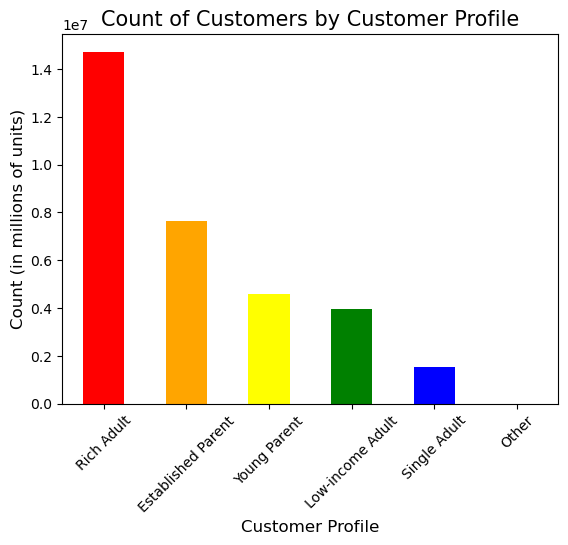

In [30]:
#creating a bar chart for the customer_profile column
bar_cust_profile = customer_merge['customer_profile'].value_counts().plot.bar(color =['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

#Adding title, format, and labels
plt.title('Count of Customers by Customer Profile', fontsize=15)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Count (in millions of units)', fontsize=12)
plt.xticks(rotation=45)


The 'Other' section might not be showing due to having a small value compared to the rest.

In [32]:
#exporting bar chart outside of jupyter in the form of an image file
bar_cust_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile.png'))

# 7.) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [34]:
#using groupby for 'customer_profile' and aggregating 'order_regularity' aggregate functions max
customer_merge.groupby('customer_profile').agg({'order_regularity': ['max']})

,order_regularity
,max
customer_profile,
Established Parent,30.0
Low-income Adult,30.0
Other,3.0
Rich Adult,30.0
Single Adult,30.0
Young Parent,30.0


In [35]:
#using groupby for 'customer_profile' and aggregating 'order_regularity' aggregate functions min
customer_merge.groupby('customer_profile').agg({'order_regularity': ['min']})

,order_regularity
,min
customer_profile,
Established Parent,0.0
Low-income Adult,0.0
Other,3.0
Rich Adult,0.0
Single Adult,0.0
Young Parent,0.0


In [36]:
#using groupby for 'customer_profile' and aggregating 'order_regularity' aggregate functions mean
customer_merge.groupby('customer_profile').agg({'order_regularity': ['mean']})

,order_regularity
,mean
customer_profile,
Established Parent,10.394725
Low-income Adult,10.733614
Other,3.000000
Rich Adult,10.311384
Single Adult,10.491285
Young Parent,10.361109


# 8.) Compare your customer profiles with regions and departments.

In [38]:
#importing departments_wrangled
departments_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [39]:
departments_wrangled

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [40]:
#renaming column Unnamed: 0 to department_id
departments_wrangled.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [41]:
#checking the columns after renaming
departments_wrangled.columns

Index(['department_id', 'department'], dtype='object')

In [42]:
#inner merge
customer_merge_d = departments_wrangled.merge(customer_merge, on = 'department_id', indicator = 'merge_d')

In [43]:
customer_merge_d.columns

Index(['department_id', 'department', 'user_id', 'first_name', 'surname',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'prices', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'Slowest days', 'Busiest_days', 'Slowest_days', 'busiest_period_of_day',
       'Busy_days', 'max_order', 'loyalty_flag', 'average_spending',
       'spending_flag', 'order_regularity', 'order_frequency_flag', 'merge_c',
       'Region', 'exclusion_flag', 'customer_profile', 'merge_d'],
      dtype='object')

In [44]:
#Creating a crosstab for the 'region' and 'departments' column
region_department = pd.crosstab(customer_merge_d['Region'], customer_merge_d['department'], dropna = False)

In [45]:
region_department.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Region 1(Northeast),26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,...,131485,46891,124620,12374,6585,329445,78879,18601,1665839,514675
Region 2(Midwest),36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,...,175824,63736,166129,16535,8420,442101,105815,22355,2227937,673715
Region 3(South),51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,...,243070,89142,235752,23193,12212,622436,150422,31269,3160551,957346
Region 4(West),39344,106026,301145,680191,181657,9045,274586,1383529,269335,223598,...,188287,69484,182426,17043,9074,481387,112719,25491,2424964,741814


In [46]:
#Creating a crosstab for the 'customer_profile' and 'departments' column
profile_department = pd.crosstab(customer_merge_d['customer_profile'], customer_merge_d['department'], dropna = False)

In [47]:
profile_department.head(10)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Established Parent,36041,101121,275256,628137,165392,8267,250475,1284667,247686,203680,...,175498,63754,166974,16088,8122,443102,105804,21875,2241116,680338
Low-income Adult,18964,39569,131655,395589,96834,4719,108528,615111,126263,88850,...,97759,28589,59421,8450,4552,208924,57035,10567,1054473,524057
Other,0,0,11,53,2,0,2,43,2,0,...,2,0,3,0,0,0,0,0,17,78
Rich Adult,68920,202648,545149,1164801,306511,14981,506111,2480925,479864,409670,...,327591,125583,349631,31180,16454,871533,201191,46159,4408787,1138163
Single Adult,6858,21140,54671,125930,32793,1551,49927,251257,49208,41013,...,34279,12935,32674,3382,1700,87566,21070,4697,443373,135534
Young Parent,22913,59324,165686,373613,101501,5055,153015,766744,148226,123414,...,103537,38392,100224,10045,5463,264244,62735,14418,1331525,409380


# 9.) Produce suitable charts to illustrate your results and export them in your project folder.

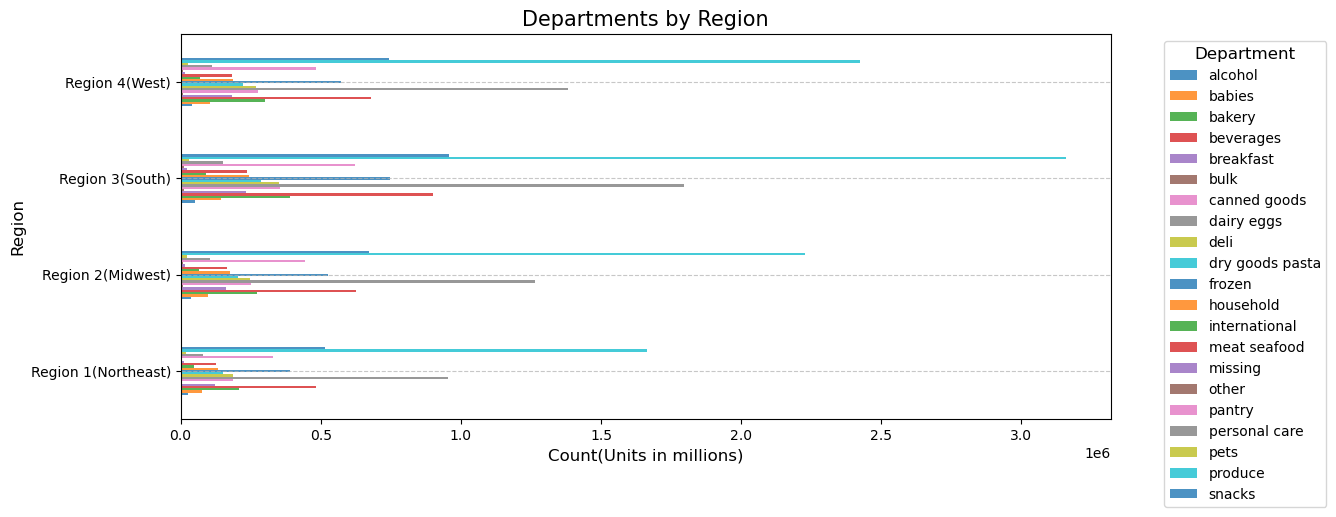

In [49]:
#Creating a bar chart that compares the department spending by region
bar_region_department = region_department.plot.barh(figsize=(12, 5), alpha=0.8)

#Adding title, legend, and labels
plt.title('Departments by Region', fontsize=15)
plt.xlabel('Count(Units in millions)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)


In [50]:
#exporting bar chart outside of jupyter in the form of an image file
bar_region_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

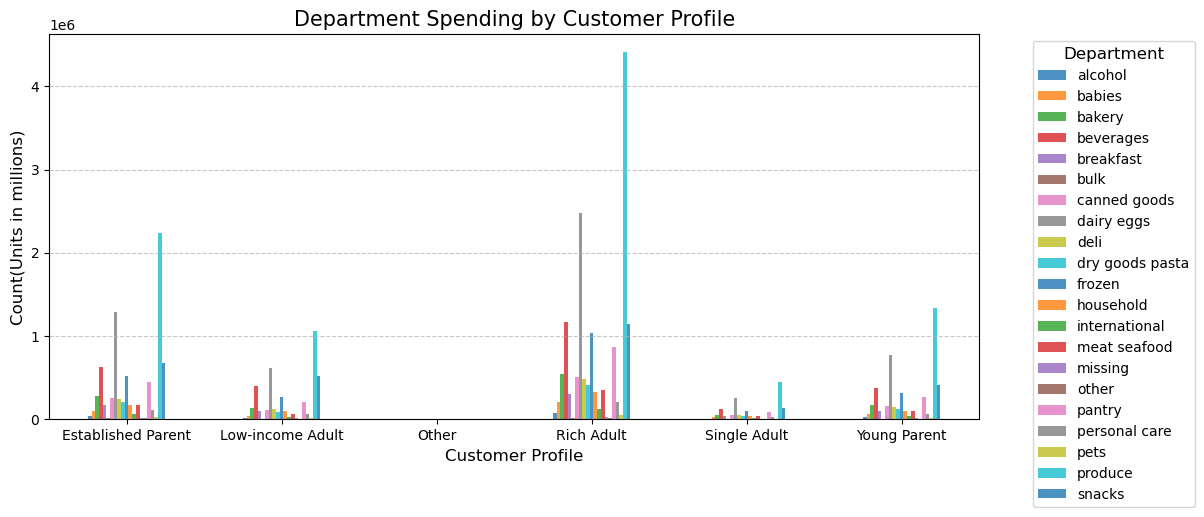

In [51]:
#Creating a bar chart that compares the department spending by customer profile
bar_profile_department = profile_department.plot.bar(figsize=(12, 5), alpha=0.8)

#Adding title, legend, and labels
plt.title('Department Spending by Customer Profile', fontsize=15)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Count(Units in millions)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)


In [52]:
#exporting bar chart outside of jupyter in the form of an image file
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_department.png'))

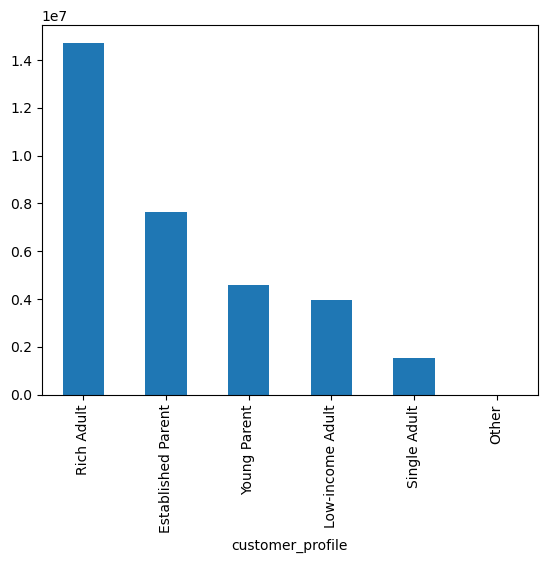

In [53]:
#Showing value counts for customer_profile column
gcbar = customer_merge['customer_profile'].value_counts().plot.bar()

In [54]:
#Showing value counts of the department column
customer_merge_d['department'].value_counts(dropna = False)

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447835
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

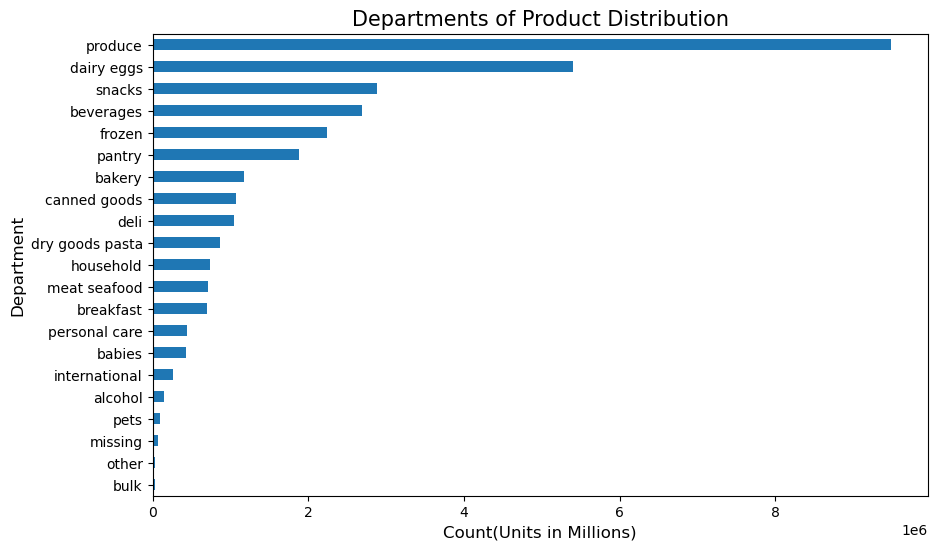

In [55]:
#Creating a bar chart using value counts for numeric values from the department column
departments_bar = customer_merge_d['department'].value_counts(dropna = False)

#Sorting department numeric values by ascending order
departments_bar = departments_bar.sort_values(ascending=True)

#Adding title, labels, and formats
plt.figure(figsize=(10, 6))
departments_bar.plot(kind = 'barh')
plt.title('Departments of Product Distribution', fontsize=15)
plt.xlabel('Count(Units in Millions)', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xticks(rotation=0)

#Exporting the bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_bar.png'))

([<matplotlib.axis.YTick at 0x1bbde542e40>,
 [Text(0, 0, 'Saturday'),
  Text(0, 1, 'Sunday'),
  Text(0, 2, 'Monday'),
  Text(0, 3, 'Tuesday'),
  Text(0, 4, 'Wednesday'),
  Text(0, 5, 'Thursday'),
  Text(0, 6, 'Friday')])

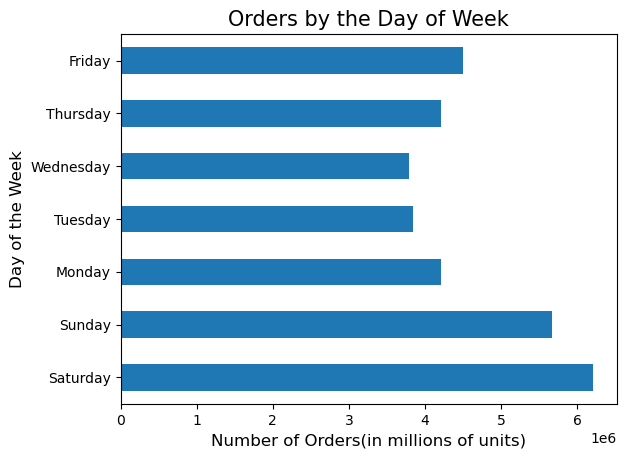

In [56]:
# creating the bar chart by 'order_day_of_week' column
bar_dow = customer_merge_d['order_day_of_week'].value_counts().sort_index().plot.barh()

#Adding title, legend, and labels
plt.title('Orders by the Day of Week', fontsize=15)
plt.xlabel('Number of Orders(in millions of units)', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=0)

#renaming the x-axis
days_of_week = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.yticks(ticks=range(len(days_of_week)), labels=days_of_week)

In [57]:
#exporting bar chart outside of jupyter in the form of an image file
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

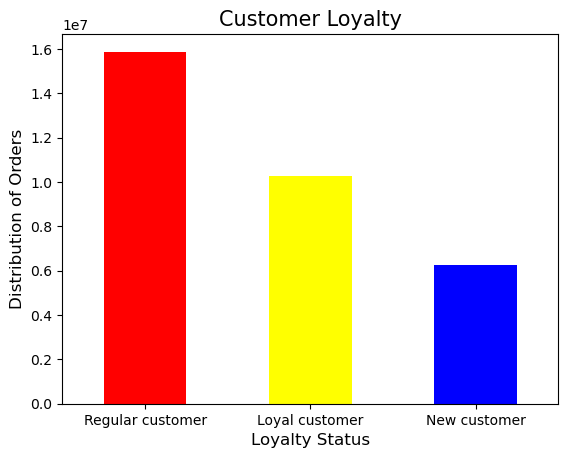

In [58]:
#creating a bar chart for the order_hour_of_day column
bar_cloyalty = customer_merge_d['loyalty_flag'].value_counts().plot.bar(color =['red', 'yellow', 'blue'])

#Adding title and labels
plt.title('Customer Loyalty', fontsize=15)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Distribution of Orders', fontsize=12)
plt.xticks(rotation=0)


In [59]:
#exporting bar chart outside of jupyter in the form of an image file
bar_cloyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cloyalty.png'))

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

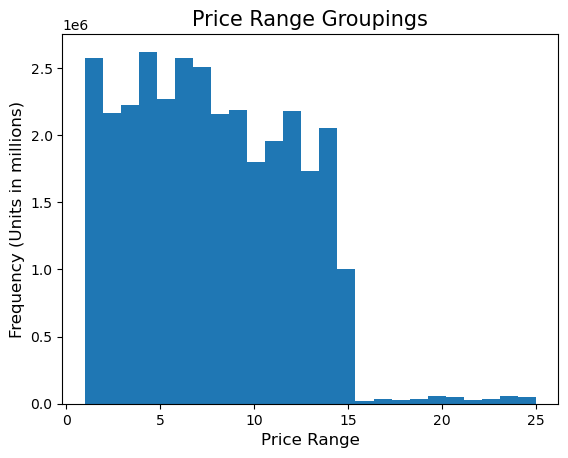

In [60]:
# creating a historgram of the prices column
price_hist = customer_merge_d['prices'].plot.hist(bins = 25)

#Adding title and labels
plt.title('Price Range Groupings', fontsize=15)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Frequency (Units in millions)', fontsize=12)
plt.xticks(rotation=0)

In [61]:
#exporting the histogram 
price_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_hist.png'))

In [153]:
#Creating a crosstab for the 'loyalty_flag' and 'days_since_prior_order' column
loyalty_dspo = pd.crosstab(customer_merge_d['loyalty_flag'], customer_merge_d['days_since_prior_order'], dropna = False)

In [143]:
loyalty_dspo.head()

days_since_prior_order,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,NaN
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,239649,626171,973224,1185976,1202987,1074730,1090996,1351322,643385,347726,...,23358,15475,12993,11561,9099,9974,11648,7137,64665,188714
New customer,50835,52139,73018,102510,128621,163022,230094,349824,223450,160455,...,86331,67588,58065,55693,58115,69405,89310,62505,1581275,1092303
Regular customer,157848,262178,417492,587714,747058,886701,1196428,1775087,1065127,709667,...,199161,142772,122365,113167,110562,124685,152195,105828,1421456,795095


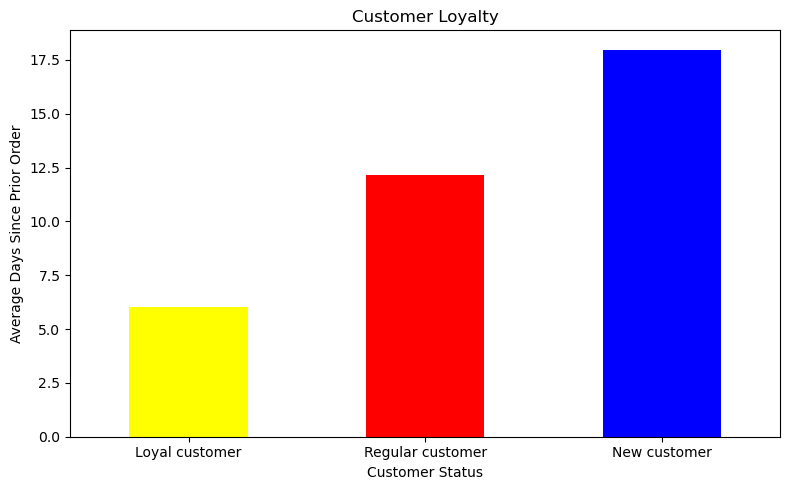

<Figure size 640x480 with 0 Axes>

In [185]:
#Creating a bar chart that takes the average value of days since prior order for each customer and compares it to the loyalty flag
average_days = customer_merge_d.groupby('loyalty_flag')['days_since_prior_order'].mean().sort_values()

#Creating a bar chart
average_days.plot(kind='bar', figsize=(8, 5), color =['yellow', 'red', 'blue'])

#adding title, labels, and formatting
plt.title('Customer Loyalty')
plt.xlabel('Customer Status')
plt.ylabel('Average Days Since Prior Order')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Exporting the bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average_days_bar.png'))